In [0]:
import torch
import torchvision 
from torchvision import datasets, transforms
from torch import nn, optim

In [0]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])    #normalize will only take one value as mean and std as the images are grayscale so only one color channel but if rgb then (0.5, 0.5, 0.5)

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [35]:
print(f"training set contains : {len(trainset)} images")
print(f"testing set contains : {len(testset)} images")


training set contains : 60000 images
testing set contains : 10000 images


In [4]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py


--2019-06-20 07:18:54--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



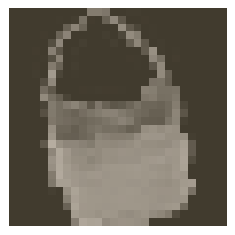

In [42]:
import helper
images, labels = next(iter(trainloader))
helper.imshow(images[0,:]);

In [43]:
print(images.shape)

torch.Size([64, 1, 28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: tensor([8, 5, 2, 7, 0, 5, 9, 0, 7, 0, 5, 6, 0, 4, 7, 9, 1, 6, 4, 2, 8, 0, 6, 7,
        9, 2, 7, 0, 0, 9, 6, 0, 0, 6, 9, 9, 2, 5, 8, 8, 7, 1, 2, 8, 4, 7, 7, 1,
        6, 1, 0, 3, 1, 1, 9, 5, 0, 0, 6, 9, 5, 3, 9, 9])


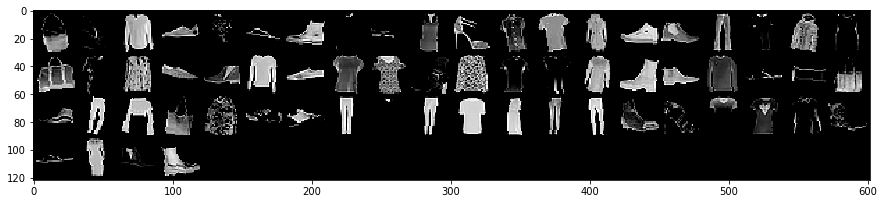

In [56]:
import matplotlib.pyplot as plt
import numpy as np
grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (15, 15))  
plt.imshow(np.transpose(grid, (1, 2, 0)))   
print('labels:', labels)

In [64]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
model = nn.Sequential(nn.Linear(784, 256), nn.ReLU(), nn.Dropout(p = 0.2), nn.Linear(256, 10), nn.LogSoftmax(dim = 1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);

In [69]:
epochs = 30
train_losses, test_losses = [], []
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    optimizer.zero_grad()
    images = images.flatten(start_dim = 1)
    images = images.to(device)  
    labels = labels.to(device)
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
      model.eval()
      for images, labels in testloader:
        images = images.flatten(start_dim=1)
        images = images.to(device)  
        labels = labels.to(device)
        log_ps = model(images)
        test_loss += criterion(log_ps,labels)
        ps = torch.exp(log_ps)
        top_p , top_class = ps.topk(1,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))    
    model.train()
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))   
    print("Epoch: {}/{}.. ".format(e+1, epochs),"Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),"Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),"Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    

Epoch: 1/30..  Training Loss: 0.462..  Test Loss: 0.455..  Test Accuracy: 0.835
Epoch: 2/30..  Training Loss: 0.460..  Test Loss: 0.453..  Test Accuracy: 0.836
Epoch: 3/30..  Training Loss: 0.457..  Test Loss: 0.450..  Test Accuracy: 0.840
Epoch: 4/30..  Training Loss: 0.453..  Test Loss: 0.447..  Test Accuracy: 0.839
Epoch: 5/30..  Training Loss: 0.451..  Test Loss: 0.445..  Test Accuracy: 0.840
Epoch: 6/30..  Training Loss: 0.449..  Test Loss: 0.443..  Test Accuracy: 0.837
Epoch: 7/30..  Training Loss: 0.448..  Test Loss: 0.439..  Test Accuracy: 0.842
Epoch: 8/30..  Training Loss: 0.444..  Test Loss: 0.439..  Test Accuracy: 0.840
Epoch: 9/30..  Training Loss: 0.442..  Test Loss: 0.438..  Test Accuracy: 0.842
Epoch: 10/30..  Training Loss: 0.442..  Test Loss: 0.437..  Test Accuracy: 0.842
Epoch: 11/30..  Training Loss: 0.438..  Test Loss: 0.432..  Test Accuracy: 0.843
Epoch: 12/30..  Training Loss: 0.437..  Test Loss: 0.432..  Test Accuracy: 0.843
Epoch: 13/30..  Training Loss: 0.435.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

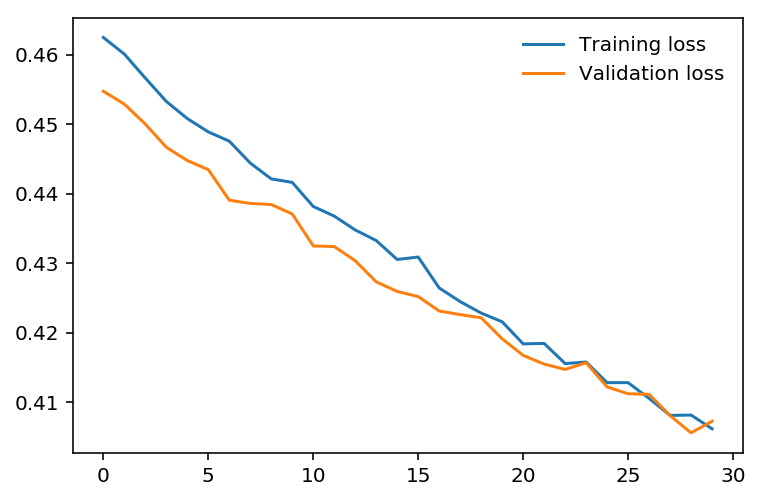

In [71]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)